# Module 4: Anomaly Detection
## Cumulative Exercise:
### Outlier Detection for Linear Regression on an Auto MPG Dataset

In this exercise, you'll be attempting linear (Ridge) regression on a dataset encoding automotive 
MPG against several other discrete and continuous variables, 
as described [here](https://archive.ics.uci.edu/ml/datasets/auto+mpg) in the UCI repository.

### Notes
1. The clearest use of this dataset is to predict MPG, which is column one in the .txt.
2. For convenience, some `NaN` values have been pre-emptively cleaned from this dataset. Looking at the original dataset, there are a handful of entries containing null or `?` values, which we have removed.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import Ridge

from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, r2_score


# path to dataset
DATASET = '/dsa/data/all_datasets/autoMPG-1.txt'
assert os.path.exists(DATASET)   # check if datafile is present

# Read your data into a DataFrame called 'dataset'
dataset = pd.read_csv(DATASET, index_col=0).dropna().sample(frac=1).reset_index(drop = True)
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,423.000000,423.000000,423.000000,423.000000,4.230000e+02,423.000000,423.000000,423.000000
mean,22.151443,5.824960,196.756004,477.616796,8.785400e+05,15.538771,82.095406,1.569740
std,8.817102,2.720733,111.032114,1411.463705,3.249376e+06,2.729471,29.467660,0.799426
min,3.625937,-0.743522,-19.283003,46.000000,1.613000e+03,8.000000,-18.076791,1.000000
25%,16.000000,4.000000,102.500000,78.000000,2.259500e+03,13.700000,73.000000,1.000000
50%,21.500000,5.056846,151.000000,96.000000,2.930000e+03,15.500000,76.000000,1.000000
75%,28.050000,8.000000,302.000000,145.000000,3.860000e+03,17.000000,80.000000,2.000000
max,46.600000,31.872541,604.080466,10222.846370,1.879313e+07,24.800000,284.100062,3.000000


Pull columns from dataset into variables X (everything except mpg) and y (mpg).

In [2]:
# Complete code below this comment  (Question #001)
# ----------------------------------

X = dataset.drop(['mpg', 'car_name'], axis=1)
y = dataset.mpg


print(X.shape, y.shape)

(423, 7) (423,)


Create training/validation split with 30% held out. 

In [3]:
# Complete code below this comment  (Question #E002)
# ----------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



Fit a Ridge regressor without anomaly detection and report R^2 measure on the train set.

In [4]:
# Complete code below this comment  (Question #E003)
# ----------------------------------

raw_model = Ridge().fit(X_train, y_train)
y_pred = raw_model.predict(X_test)

raw_model.score(X_train, y_train)

0.6055525076787709

In [5]:
# Seeing as how I did question 4 differently I am following up to 3 with the revised code

r2_score(y_test, y_pred)

# Since this is using the testing data, not the train like above, this score is different. 

0.645369638381985

Create prediction from X_test and store into variable <span style="background: yellow;">naive_predictions</span>. Report R^2 measure.

In [6]:
# Complete code below this comment  (Question #E004)
# ----------------------------------

naive_model = LinearRegression().fit(X_train, y_train)
naive_predictions = naive_model.predict(X_test)

r2_score(y_test, naive_predictions)



0.6455539385197123

Create a scatter plot of y_test against naive predictions.  
The following is for reference.

~~~python
plt.scatter(<placeholder>, <placeholder>)
plt.title("No outlier reduction")
plt.xlabel("Y-actual (raw splits)")
plt.ylabel("Y-predicted (from raw model)")
plt.show()
~~~

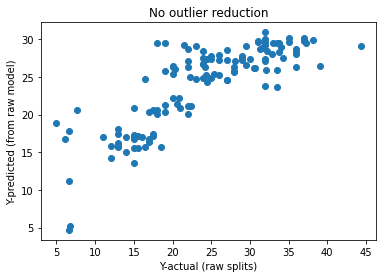

In [7]:
# Complete code below this comment  (Question #E005)
# ----------------------------------

plt.scatter(y_test, naive_predictions)
plt.title("No outlier reduction")
plt.xlabel("Y-actual (raw splits)")
plt.ylabel("Y-predicted (from raw model)")
plt.show()




### Using a model of your choice, remove outliers from X and y.

Import your tools for outlier reduction.  
Options include: `KMeans`, `EllipticEnvelope`, `IsolationForest`, and `OneClassSVM`. 

In [8]:
# Complete code below this comment  (Question #E006)
# ----------------------------------

# Isolation Forest

from sklearn.ensemble import IsolationForest


Create training/test set with the removal of outliers from the above training/test set. 

In [9]:
# Complete code below this comment  (Question #E007)
# ----------------------------------

iso_forest = IsolationForest(contamination=.005).fit(X_train, y_train)



Fit a new model against inliers and print score (R^2) for the model.

In [10]:
# Complete code below this comment  (Question #E008)
# ----------------------------------

iso_outliers = iso_forest.predict(X_train)==-1
print(f"Num of outliers = {np.sum(iso_outliers)}")
X_iso = X_train[~iso_outliers]
y_iso = y_train[~iso_outliers]

iso_model = Ridge()
iso_model.fit(X_iso, y_iso)

iso_scores = cross_val_score(estimator=iso_model, X=X_iso, y=y_iso)
print(iso_scores)
print("Mean CV score w/ IsolationForest:", np.mean(iso_scores))

Num of outliers = 2
[0.60453879 0.61735446 0.44455576 0.36505725 0.68439498]
Mean CV score w/ IsolationForest: 0.5431802484921848


Predict with the test set, report R^2, and plot y-actual against y-predicted again for labels in testing set.

In [11]:
# Complete code below this comment  (Question #E009)
# ----------------------------------
iso_predictions = iso_model.predict(X_test)

r2_score(y_test, iso_predictions)



0.6374353826665995

In [12]:
# So this score looks better. 
iso_model.score(X_iso, y_iso)

0.6385568267979342

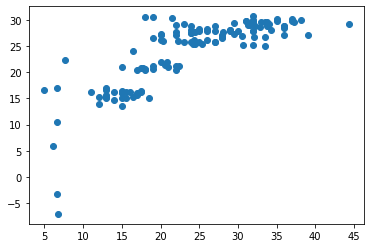

In [13]:
plt.scatter(y_test, iso_predictions)
plt.show()

Pickle (serialize) your model as the file named: `my_module_4_model.pkl`

In [14]:
# Complete code below this comment  (Question #E010)
# ----------------------------------

import joblib

joblib.dump(iso_model, 'my_module_4_model.pkl')




['my_module_4_model.pkl']

# Save your notebook!